## Initialize tools and packages that are required to execute this notebook.

In [1]:
from thermoengine import equilibrate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy
%matplotlib inline

## Create a MELTS v 1.0.2 instance.
Rhyolite-MELTS version 1.0.2 is the default model.

In [2]:
melts = equilibrate.MELTSmodel(version="5.6.1")

### Optional: Generate some information about the implemented model.

In [3]:
oxides = melts.get_oxide_names()
phases = melts.get_phase_names()
#print (oxides)
#print (phases)

## Required: Input initial composition of the system (liquid), in wt% or grams of oxides. 
Mid-Atlantic ridge MORB composition

In [4]:
#Fe2O3 Calc 
def Fe2O3Calc(FeOwt, Fe3FeT_ratio):
    FeO = FeOwt * (1 - Fe3FeT_ratio)
    Fe2O3 = FeOwt * (Fe3FeT_ratio) * 1.11 # 1.11 converts for molar mass diferences
    return FeO, Fe2O3

In [5]:
# Workman and Hart Depleted MORB Mantle

melt_composition = {'SiO2':  44.7, 
                   'TiO2':   0.13, 
                   'Al2O3':  3.98, 
                   #'Fe2O3':  Fe2O3,#  # Need to calcuate ferric iron for models to run properly Assumed 4%
                   'Cr2O3':  0.57, 
                   'FeO':    8.18, # Total Feo 8.18 wt% 
                   'MnO':    0.0, #0.13 Excluded for modeling
                   'MgO':   38.73, 
                   #'NiO':    0.0, #0.24 Excluded 
                   #'CoO':    0.0,
                   'CaO':    3.17, 
                   'Na2O':   0.28, 
                   'K2O':    0.006, #0.006
                   #'P2O5':   0.0, # 0.019
                   #'H2O':    0.011,
                   }

def set_melt_composition(comp_dict_init, Fe3FeT_ratio, H2O_wt, melts_object = melts):
    # Assumes all iron is input as FeO modify this if needed
    comp_dict = deepcopy(comp_dict_init)
    FeO, Fe2O3 = Fe2O3Calc(comp_dict['FeO'],Fe3FeT_ratio) 
    comp_dict.update([("FeO",FeO), ("Fe2O3", Fe2O3), ("H2O",H2O_wt)])
    # Set bulk composition in Melts
    melts_object.set_bulk_composition(comp_dict) # 0.011 Water included 110 ppm

In [6]:
set_melt_composition(melt_composition, Fe3FeT_ratio=0.1, H2O_wt=0.011)

## Optional: Suppress phases that are not required in the simulation.

In [7]:
b = melts.get_phase_inclusion_status()
melts.set_phase_inclusion_status({'Actinolite':False, 'Aegirine':False, \
                                  'Aenigmatite':False, 'Akermanite':False, 'Andalusite':False, \
                                  'Anthophyllite':False, 'Apatite':True, 'Biotite':False, 'Chromite':False, \
                                  'Coesite':False, 'Corundum':False, 'Cristobalite':False, 'Cummingtonite':False, \
                                  'Fayalite':False, 'Forsterite':False, 'Gehlenite':False, 'Hematite':False, \
                                  'Hornblende':False, 'Ilmenite':False, 'Ilmenite ss':False, 'Kalsilite':False, \
                                  'Kalsilite ss':False, 'Kyanite':False, 'Leucite':False, 'Lime':False, \
                                  'Liquid Alloy':False, 'Magnetite':False, 'Melilite':False, 'Muscovite':False, \
                                  'Nepheline':False, 'Nepheline ss':False, 'OrthoOxide':False, 'Panunzite':False, \
                                  'Periclase':False, 'Perovskite':False, 'Phlogopite':False, 'Quartz':False, \
                                  'Rutile':False, 'Sanidine':False, 'Sillimanite':False, 'Solid Alloy':False, \
                                  'Sphene':False, 'Tridymite':False, 'Whitlockite':False})

a = melts.get_phase_inclusion_status()
for phase in b.keys():
    if b[phase] != a[phase]:
        print ("{0:<15s} Before: {1:<5s} After: {2:<5s}".format(phase, repr(b[phase]), repr(a[phase])))

Actinolite      Before: True  After: False
Aegirine        Before: True  After: False
Aenigmatite     Before: True  After: False
Akermanite      Before: True  After: False
Andalusite      Before: True  After: False
Anthophyllite   Before: True  After: False
Biotite         Before: True  After: False
Chromite        Before: True  After: False
Coesite         Before: True  After: False
Corundum        Before: True  After: False
Cristobalite    Before: True  After: False
Cummingtonite   Before: True  After: False
Fayalite        Before: True  After: False
Forsterite      Before: True  After: False
Gehlenite       Before: True  After: False
Hematite        Before: True  After: False
Hornblende      Before: True  After: False
Ilmenite        Before: True  After: False
Ilmenite ss     Before: True  After: False
Kalsilite       Before: True  After: False
Kalsilite ss    Before: True  After: False
Kyanite         Before: True  After: False
Leucite         Before: True  After: False
Lime       

### Obtain default set of fractionation coefficients (retain liquids, fractionate solids and fluids)

In [8]:
frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=True, fracSolid=False, fracFluid=False, fracCoeff=0.0)
print (frac_coeff)

{'Actinolite': 0.0, 'Aegirine': 0.0, 'Aenigmatite': 0.0, 'Akermanite': 0.0, 'Andalusite': 0.0, 'Anthophyllite': 0.0, 'Apatite': 0.0, 'Augite': 0.0, 'Biotite': 0.0, 'Chromite': 0.0, 'Coesite': 0.0, 'Corundum': 0.0, 'Cristobalite': 0.0, 'Cummingtonite': 0.0, 'Fayalite': 0.0, 'Forsterite': 0.0, 'Garnet': 0.0, 'Gehlenite': 0.0, 'Hematite': 0.0, 'Hornblende': 0.0, 'Ilmenite': 0.0, 'Ilmenite ss': 0.0, 'Kalsilite': 0.0, 'Kalsilite ss': 0.0, 'Kyanite': 0.0, 'Leucite': 0.0, 'Lime': 0.0, 'Liquid': 0.0, 'Liquid Alloy': 0.0, 'Magnetite': 0.0, 'Melilite': 0.0, 'Muscovite': 0.0, 'Nepheline': 0.0, 'Nepheline ss': 0.0, 'Olivine': 0.0, 'OrthoOxide': 0.0, 'Orthopyroxene': 0.0, 'Panunzite': 0.0, 'Periclase': 0.0, 'Perovskite': 0.0, 'Phlogopite': 0.0, 'Pigeonite': 0.0, 'Plagioclase': 0.0, 'Quartz': 0.0, 'Rutile': 0.0, 'Sanidine': 0.0, 'Sillimanite': 0.0, 'Solid Alloy': 0.0, 'Sphene': 0.0, 'Spinel': 0.0, 'Titanaugite': 0.0, 'Tridymite': 0.0, 'Water': 0.0, 'Whitlockite': 0.0}


## Output to collect in a dataframe
- Temperature (°C)
- Pressure (MPa)
- Liquid composition (wt% oxides)
- Liquid fraction (wt%)
- Solid Mass Fractions (wt%)
- Calulate Melt Fraction
- Fractionation Coefficients 

Each Model run needs to also store a dictionary of the following parameters:
- Model Type (MELTS version)
- Initial Composition (wt% oxides)
- Suppressed Phases
- Calculation Parameters (T, P, fO2, Potential Temperature and Adiabat Gradient, etc)
- P/T per model step
- Threshold for Melt Fraction Removal. (Dynamic Fractionation)




## Model behavior
- Function to run MELTS at specified T and P path, returning output dataframe and parameters dictionary.
- Reinitialize model with new initial composition and suppressed phases.
- Reinitialize melt fraction coefficients to zero

In [9]:
def run_dynamic_fractional_melting(t0,
                                   t_f,
                                   p0,
                                   p_f=1,
                                   n_steps=40,
                                   t_step=-0.825,
                                   p_step=-50.0,
                                   threshold_melt_fraction=0.01,
                                   melts_obj=melts,
                                   frac_coeff_in=frac_coeff,
                                   track_phases=None,
                                   write_excel=False,
                                   excel_filename="dynamic_fractionation_summary.xlsx",
                                   sheet_name="Summary"):
    """
    Run a dynamic fractional melting sequence along a specified P-T path.

    Parameters:
    - t0, p0: initial temperature (°C) and pressure (MPa)
    - n_steps: number of steps (including initial)
    - t_step, p_step: increments applied at each step (can be negative)
    - threshold_melt_fraction: melt fraction threshold below which no melt is removed
    - melts_obj: MELTS model object (uses global `melts` by default)
    - frac_coeff_in: initial dictionary of fractionation coefficients (copied internally)
    - track_phases: list of phase names to record masses (defaults to common set)
    - write_excel: whether to create/update/write an Excel workbook via melts methods
    - excel_filename, sheet_name: workbook parameters when write_excel=True

    Returns:
    - df: pandas.DataFrame with recorded step data (T, P, masses, liquid fractions, oxide wt% of liquid, frac_coeff_liq)
    - params: dictionary with run parameters
    """
    p_array = np.arange(p0,p_f, p_step)
    # t_step = t_step/p_step * pstep
    
    t_array = np.linspace(t0,t_f, len(p_array))

    # defaults
    if track_phases is None:
        track_phases = ['Liquid', 'Olivine', 'Orthopyroxene', 'Augite', 'Spinel']

    # oxide list (use existing variable if present)
    try:
        oxide_list = oxides
    except NameError:
        oxide_list = melts_obj.get_oxide_names()

    # prepare fractionation coefficients copy
    frac_coeff = dict(frac_coeff_in) if frac_coeff_in is not None else {}

    # prepare storage
    rows = []

    # optional excel workbook
    wb = None
    if write_excel:
        wb = melts_obj.start_excel_workbook_with_sheet_name(sheetName=sheet_name)

    # initial equilibrium
    # output = melts_obj.equilibrate_tp(t0, p0, initialize=True)
    # (status, t, p, xmlout) = output[0]

    # loop steps
    # for step in range(n_steps):
    for idx, p in enumerate(p_array):
        t = t_array[idx]
        output = melts_obj.equilibrate_tp(t, p, initialize=True)
        
        (status, _, _, xmlout) = output[0]
        # compute masses and fractions
        total_mass = melts_obj.get_mass_of_phase(xmlout)
        liquid_mass = melts_obj.get_mass_of_phase(xmlout, phase_name="Liquid")
        liquid_fraction = (liquid_mass / total_mass) if total_mass and total_mass != 0 else 0.0



        # record tracked phase masses
        phase_masses = {ph: melts_obj.get_mass_of_phase(xmlout, phase_name=ph) for ph in track_phases}

        # record liquid composition (wt% oxides)
        liquid_comp = melts_obj.get_composition_of_phase(xmlout, phase_name='Liquid', mode='oxide_wt')

        # ensure all oxides present
        liquid_comp_full = {ox: float(liquid_comp.get(ox, 0.0)) for ox in oxide_list}

        # record current frac coefficient for Liquid (if present)
        frac_liq = float(frac_coeff.get('Liquid', 0.0))

        # append row
        row = {
            'step': idx,
            'status': status,
            'T_C': t,
            'P_MPa': p,
            'total_mass_g': total_mass,
            'liquid_mass_g': liquid_mass,
            'liquid_fraction': liquid_fraction,
            'frac_liq_coeff': frac_liq
        }
        # add phase masses
        for ph, m in phase_masses.items():
            row[f'mass_{ph}'] = m
        # add oxide wt% of liquid
        for ox, v in liquid_comp_full.items():
            row[f'liq_oxide_{ox}'] = v

        rows.append(row)

        # update excel if requested
        if write_excel:
            melts_obj.update_excel_workbook(wb, xmlout)

        # prepare for next step: fractionate then re-equilibrate (unless last step)
        if idx < len(p_array) - 1:
            # decide fraction to remove from Liquid
            if liquid_fraction > threshold_melt_fraction and liquid_fraction > 0.0:
                frac_coeff['Liquid'] = (liquid_fraction - threshold_melt_fraction) / liquid_fraction
            else:
                frac_coeff['Liquid'] = 0.0

            # apply fractionation
            melts_obj.fractionate_phases(xmlout, frac_coeff)

            # equilibrate at next PT
            # output = melts_obj.equilibrate_tp(t + t_step, p + p_step, initialize=True)
            
            # (status, t, p, xmlout) = output[0]
            
        print(f"T:{t}, P:{p}")

    # finalize excel
    if write_excel:
        melts_obj.write_excel_workbook(wb, excel_filename)

    
    
    # build dataframe
    df = pd.DataFrame(rows)

    params = {
        'initial_T_C': t0,
        'initial_P_MPa': p0,
        'n_steps': n_steps,
        't_step': t_step,
        'p_step': p_step,
        'threshold_melt_fraction': threshold_melt_fraction,
        'tracked_phases': track_phases,
        'oxide_list': oxide_list,
        'frac_coeff_final': dict(frac_coeff)
    }
    df['liq_oxide_FeOTotal'] = df["liq_oxide_FeO"] + df['liq_oxide_Fe2O3']/1.11

    return df, params

def adiabat_calc(potential_temp = 1373, slope_C_per_GPa = 18/1000, p0 = 3000, p_f = 1, n_steps = 60):

    t0 = potential_temp + slope_C_per_GPa * p0

    return{"t0":t0, "t_f": potential_temp, "p0":p0, "p_f" : p_f, "n_steps": 60, "p_step" : -(p0 -p_f)/n_steps, "t_step": -(t0-potential_temp)/n_steps }

    #Example Adiabat arrays with 18˚ per GPa.
    # adiabat_t = np.array((1377,1404.5,1415,1425.5,1431))
    # adiabat_p = np.array((0,1.500015,2.100021,2.700027,3.00003))


def accumulate_melt_along_path(df, weight_deeper = False, depth_weighting_multiplier_perMPa = 1):
    """
    Calculates the accumulated melt composition over a PT path
    Parameters:
        df: the Data Frame of melts model resutls output by the function run_dynamic_fractional_melting()
        depth_weighting_multiplier_perMPa: used to preferentially weight melts accumualted deeper in the melting column to accuount for wedge shaped geometry of the spreading center
    """
    depth_weighting_multipliers = 1
    if weight_deeper:
        depth_weighting_multipliers = df["P_MPa"] * depth_weighting_multiplier_perMPa/1000
        
    df_liq_comp = df.filter(like="liq_oxide") # Filters for only liquid compositional data
    melt_removed = df['total_mass_g'].diff() * depth_weighting_multipliers # Calulates the melt removed at each timestep
    cumm_removed = melt_removed.cumsum().round(6)
    #cumm_removed = (df['total_mass_g'] - df['total_mass_g'][0]).round(6) * depth_weighting_multipliers # Cummulative Melt Removed from system
    melt_extract_grams = (melt_removed * df_liq_comp.T).T # Composition of melt removed in grams
    accumulated_melt_grams = melt_extract_grams.cumsum() # Cummulative sum of melts composition removed in grams
    accumulated_melt_wt_percent = (accumulated_melt_grams.T/cumm_removed).T.replace([np.inf, -np.inf], np.nan) # Converts composition from mass to weight percent
    return accumulated_melt_wt_percent

In [10]:
# Parameter Space to explore and plot. 1) Potential Temp, 2) H2O, 3) Oxidation State, 4) Fractionation Threshold

In [11]:
def run_melts_accumulation(potential_temp=1373,
                           Fe3FeT_ratio=0.1,
                           H2O_wt=0.011,
                           slope_C_per_GPa=18/1000,
                           p0=3000,
                           p_f=1,
                           n_steps=60,
                           fractionation_threshold=0.01,
                           depth_weighting_multiplier_perMPa=1,
                           weight_deeper=False,
                           melts_obj=melts,
                           frac_coeff_in=frac_coeff,
                           melt_comp_dict=melt_composition,
                           write_excel=False,
                           excel_filename="dynamic_fractionation_summary.xlsx",
                           sheet_name="Summary"):
    """
    Run MELTS along an adiabat, perform dynamic fractional melting, accumulate extracted melt,
    and return inputs + results dataframe.
    """
    # set bulk composition
    set_melt_composition(melt_comp_dict, Fe3FeT_ratio=Fe3FeT_ratio, H2O_wt=H2O_wt, melts_object=melts_obj)

    # adiabat
    adiabat_dict = adiabat_calc(potential_temp=potential_temp,
                               slope_C_per_GPa=slope_C_per_GPa,
                               p0=p0, p_f=p_f, n_steps=n_steps)

    # run dynamic fractional melting
    df, run_params = run_dynamic_fractional_melting(
        t0=adiabat_dict["t0"],
        t_f=adiabat_dict["t_f"],
        p0=adiabat_dict["p0"],
        p_f=adiabat_dict["p_f"],
        n_steps=adiabat_dict["n_steps"],
        t_step=adiabat_dict["t_step"],
        p_step=adiabat_dict["p_step"],
        threshold_melt_fraction=fractionation_threshold,
        melts_obj=melts_obj,
        frac_coeff_in=frac_coeff_in,
        track_phases=None,
        write_excel=write_excel,
        excel_filename=excel_filename,
        sheet_name=sheet_name
    )

    # accumulate melts along path
    try:
        accumulated_melts = accumulate_melt_along_path(df,
                                                       weight_deeper=weight_deeper,
                                                       depth_weighting_multiplier_perMPa=depth_weighting_multiplier_perMPa)
    except TypeError:
        # fallback if accumulate_melt_along_path signature is different
        accumulated_melts = accumulate_melt_along_path(df,
                                                       depth_weighting_multiplier_perMPa=depth_weighting_multiplier_perMPa)
    # combine results
    df_combined = pd.concat([df, accumulated_melts.add_suffix("_accumulated")], axis=1)

    inputs = {
        "potential_temp": potential_temp,
        "Fe3FeT_ratio": Fe3FeT_ratio,
        "H2O_wt": H2O_wt,
        "slope_C_per_GPa": slope_C_per_GPa,
        "p0": p0,
        "p_f": p_f,
        "n_steps": n_steps,
        "fractionation_threshold": fractionation_threshold,
        "depth_weighting_multiplier_perMPa": depth_weighting_multiplier_perMPa,
        "weight_deeper": weight_deeper,
        "excel_written": write_excel,
        "excel_filename": excel_filename,
        "sheet_name": sheet_name
    }

    return {"inputs": inputs, "run_params": run_params, "results_df": df_combined, "accumulated_melts": accumulated_melts}

In [12]:

melt_model_dict = run_melts_accumulation(potential_temp=1373,
                           Fe3FeT_ratio=0.1,
                           H2O_wt=0.011,
                           slope_C_per_GPa=18/1000,
                           p0=3000,
                           p_f=1,
                           n_steps=60,
                           fractionation_threshold=0.01,
                           depth_weighting_multiplier_perMPa=1,
                           weight_deeper=False,
                           melts_obj=melts,
                           frac_coeff_in=frac_coeff,
                           melt_comp_dict=melt_composition,
                           write_excel=False,
                           excel_filename="dynamic_fractionation_summary.xlsx",
                           sheet_name="Summary")

T:1427.0, P:3000.0
T:1426.084745762712, P:2950.016666666667
T:1425.1694915254238, P:2900.0333333333338
T:1424.2542372881355, P:2850.0500000000006
T:1423.3389830508474, P:2800.0666666666675
T:1422.4237288135594, P:2750.0833333333344
T:1421.5084745762713, P:2700.1000000000013
T:1420.593220338983, P:2650.116666666668
T:1419.677966101695, P:2600.133333333335
T:1418.7627118644068, P:2550.150000000002
T:1417.8474576271187, P:2500.166666666669
T:1416.9322033898304, P:2450.1833333333357
T:1416.0169491525423, P:2400.2000000000025
T:1415.1016949152543, P:2350.2166666666694
T:1414.1864406779662, P:2300.2333333333363
T:1413.2711864406779, P:2250.250000000003
T:1412.3559322033898, P:2200.26666666667
T:1411.4406779661017, P:2150.283333333337
T:1410.5254237288136, P:2100.300000000004
T:1409.6101694915253, P:2050.3166666666707
T:1408.6949152542372, P:2000.3333333333376
T:1407.7796610169491, P:1950.3500000000045
T:1406.864406779661, P:1900.3666666666713
T:1405.949152542373, P:1850.3833333333382
T:1405.

In [19]:
def plot_melt_df(df, x, y, ax=None, kind="line", xlabel=None, ylabel=None, label = None, title=None, legend=True, **plt_kwargs):
    """
    General plotting helper for melt results DataFrame.
    - df: pandas.DataFrame
    - x: column name for x axis (str)
    - y: column name or list of column names for y axis
    - ax: matplotlib Axes to plot into (created if None)
    - kind: "line" (default), "scatter", or "bar"
    - xlabel, ylabel, title: optional labels
    - legend: show legend when plotting multiple y columns
    - plt_kwargs: forwarded to ax.plot / ax.scatter / ax.bar
    Returns: matplotlib Axes
    """
    if ax is None:
        fig, ax = plt.subplots()
    if isinstance(y, (str, int)):
        y = [y]

    for col in y:
        if label == None:
            label_out = str(col)
        else:
            label_out = label
        if kind in ("line", "plot"):
            ax.plot(df[x], df[col], label=label_out, **plt_kwargs)
        elif kind == "scatter":
            ax.scatter(df[x], df[col], label=label_out, **plt_kwargs)
        elif kind == "bar":
            ax.bar(df[x], df[col], label=label_out, **plt_kwargs)
        else:
            raise ValueError(f"Unsupported kind: {kind}")

    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(str(x))
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)
    if legend and len(y) > 1:
        ax.legend()
    return ax


def plot_accumulated_vs_instant(df, x="P_MPa", oxide_key="liq_oxide_FeO", ax=None, kind="line", **plt_kwargs):
    """
    Convenience: plots an oxide's instantaneous liquid composition column and its accumulated counterpart
    - oxide_key: exact column name for instantaneous oxide (e.g. "liq_oxide_FeO" or "liq_oxide_FeOTotal")
    Expects accumulated columns to be named like "<oxide_key>_accumulated".
    Returns: ax
    """
    acc_col = f"{oxide_key}_accumulated"
    cols_to_plot = []
    if oxide_key in df.columns:
        cols_to_plot.append(oxide_key)
    if acc_col in df.columns:
        cols_to_plot.append(acc_col)
    if not cols_to_plot:
        raise KeyError(f"Neither {oxide_key} nor {acc_col} found in DataFrame columns")
    
    

    # default markers/colors can be overridden via plt_kwargs
    return plot_melt_df(df, x, cols_to_plot, ax=ax, kind=kind, **plt_kwargs)

In [20]:
from copy import deepcopy

def run_parameter_sweep(param_name, param_values, base_kwargs=None, run_func=run_melts_accumulation):
    """
    Run run_melts_accumulation for each value in param_values.
    - param_name: str name of the keyword argument to vary
    - param_values: iterable of values
    - base_kwargs: dict of other kwargs to pass to run_func
    - run_func: callable (defaults to run_melts_accumulation)
    Returns: dict mapping value -> run_func(...) return (usually a dict with 'results_df' etc.)
    """
    base_kwargs = {} if base_kwargs is None else dict(base_kwargs)
    results = {}
    for val in param_values:
        kwargs = deepcopy(base_kwargs)
        kwargs[param_name] = val
        results[val] = run_func(**kwargs)
    return results


def plot_parameter_sweep(results_dict,
                         param_name,
                         oxide_key="liq_oxide_FeOTotal",
                         x="P_MPa",
                         ax=None,
                         kind="line",
                         marker=".",
                         accumulated=True,
                         **plt_kwargs):
    """
    Plot sweep results stored in results_dict (value -> run result dict).
    - oxide_key: instantaneous oxide column name (e.g. "liq_oxide_FeO" or "liq_oxide_FeOTotal")
    - if accumulated=True, will plot "<oxide_key>_accumulated" instead
    - extra plt_kwargs forwarded to plotting call (color, linestyle, etc.)
    Returns: matplotlib Axes
    """
    if ax is None:
        fig, ax = plt.subplots()

    col_suffix = "_accumulated" if accumulated else ""
    target_col = oxide_key + col_suffix

    for val, res in results_dict.items():
        df = res.get("results_df") if isinstance(res, dict) else res
        if target_col not in df.columns:
            # skip missing column
            continue
        label = f"{param_name}={val}"
        # ensure marker/label passed to plotting
        kwargs = dict(plt_kwargs)
        kwargs.update({"marker": marker, "label": label})
        plot_melt_df(df, x, target_col, ax=ax, kind=kind, **kwargs)

    ax.legend()
    return ax

T:1402.0, P:3000.0
T:1401.084745762712, P:2950.016666666667
T:1400.1694915254238, P:2900.0333333333338
T:1399.2542372881355, P:2850.0500000000006
T:1398.3389830508474, P:2800.0666666666675
T:1397.4237288135594, P:2750.0833333333344
T:1396.5084745762713, P:2700.1000000000013
T:1395.593220338983, P:2650.116666666668
T:1394.677966101695, P:2600.133333333335
T:1393.7627118644068, P:2550.150000000002
T:1392.8474576271187, P:2500.166666666669
T:1391.9322033898304, P:2450.1833333333357
T:1391.0169491525423, P:2400.2000000000025
T:1390.1016949152543, P:2350.2166666666694
T:1389.1864406779662, P:2300.2333333333363
T:1388.2711864406779, P:2250.250000000003
T:1387.3559322033898, P:2200.26666666667
T:1386.4406779661017, P:2150.283333333337
T:1385.5254237288136, P:2100.300000000004
T:1384.6101694915253, P:2050.3166666666707
T:1383.6949152542372, P:2000.3333333333376
T:1382.7796610169491, P:1950.3500000000045
T:1381.864406779661, P:1900.3666666666713
T:1380.949152542373, P:1850.3833333333382
T:1380.

<Axes: xlabel='P_MPa'>

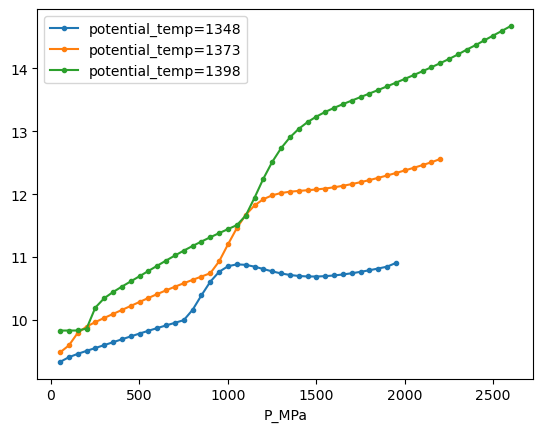

In [ ]:
parameter_dict = {"potential_temp":1373,
            'Fe3FeT_ratio':0.1,
            'H2O_wt':0.011,
            'fractionation_threshold':0.01,
            'depth_weighting_multiplier_perMPa':1,
            'weight_deeper':False}

temps = [1373 - 25, 1373, 1373+25]
param_name = "potential_temp"
results_dict = run_parameter_sweep (param_name=param_name, param_values=temps, base_kwargs=None, run_func=run_melts_accumulation)


<Axes: title={'center': 'Accumulated Melts'}, xlabel='P_MPa', ylabel='FeO Total (wt%)'>

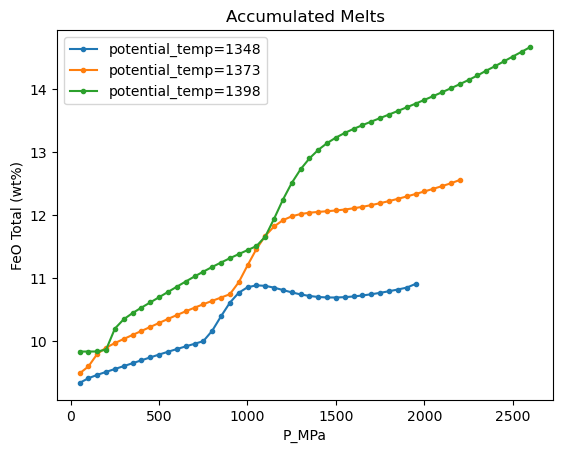

In [27]:

plot_parameter_sweep(results_dict= results_dict,
                        param_name = param_name,
                        oxide_key="liq_oxide_FeOTotal",
                        x="P_MPa",
                        ax=None,
                        kind="line",
                        marker=".",
                        accumulated=True, 
                        ylabel = "FeO Total (wt%)",
                        title = "Accumulated Melts")


<Axes: xlabel='P_MPa', ylabel='FeO Wt%'>

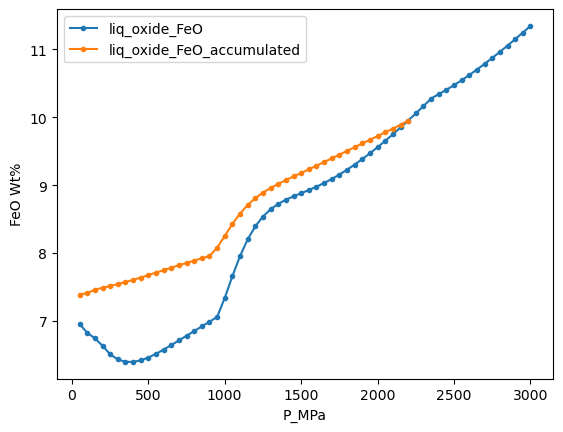

In [14]:
plot_accumulated_vs_instant(melt_model_dict['results_df'], ylabel = "FeO Wt%", marker = ".")

In [ ]:
melt_model_dict['results_df']

: 

In [28]:
df.columns

Index(['step', 'status', 'T_C', 'P_MPa', 'total_mass_g', 'liquid_mass_g',
       'liquid_fraction', 'frac_liq_coeff', 'mass_Liquid', 'mass_Olivine',
       'mass_Orthopyroxene', 'mass_Augite', 'mass_Spinel', 'liq_oxide_SiO2',
       'liq_oxide_TiO2', 'liq_oxide_Al2O3', 'liq_oxide_Fe2O3',
       'liq_oxide_Cr2O3', 'liq_oxide_FeO', 'liq_oxide_MnO', 'liq_oxide_MgO',
       'liq_oxide_NiO', 'liq_oxide_CoO', 'liq_oxide_CaO', 'liq_oxide_Na2O',
       'liq_oxide_K2O', 'liq_oxide_P2O5', 'liq_oxide_H2O',
       'liq_oxide_FeOTotal', 'liq_oxide_SiO2_accumulated',
       'liq_oxide_TiO2_accumulated', 'liq_oxide_Al2O3_accumulated',
       'liq_oxide_Fe2O3_accumulated', 'liq_oxide_Cr2O3_accumulated',
       'liq_oxide_FeO_accumulated', 'liq_oxide_MnO_accumulated',
       'liq_oxide_MgO_accumulated', 'liq_oxide_NiO_accumulated',
       'liq_oxide_CoO_accumulated', 'liq_oxide_CaO_accumulated',
       'liq_oxide_Na2O_accumulated', 'liq_oxide_K2O_accumulated',
       'liq_oxide_P2O5_accumulated', 'liq_

<Axes: xlabel='P_MPa'>

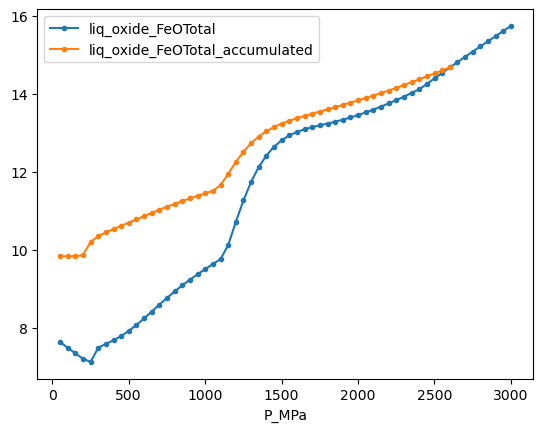

In [37]:
# df['liq_oxide_FeOTotal'] = df["liq_oxide_FeO"] + df['liq_oxide_Fe2O3']/1.11
# df2 = df
fig, ax = plt.subplots()
df.plot("P_MPa", "liq_oxide_FeOTotal", marker = '.', ax = ax)
df.plot("P_MPa", "liq_oxide_FeOTotal_accumulated", marker = '.', ax = ax)
